In [214]:
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [215]:
final_vectorizer = pickle.load(open('final_vectorizer.pkl', 'rb'))
final_model = pickle.load(open('final_model.pkl', 'rb'))

In [216]:
def fake_news_prediction(news):
    port_stem = PorterStemmer()
    con = re.sub('[^a-zA-Z]', ' ', news)
    con = con.lower()
    con = con.split()
    con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    input_data = [con]
    vectorized_data = final_vectorizer.transform(input_data)
    
    prediction = final_model.predict(vectorized_data)
    prediction_proba = final_model.predict_proba(vectorized_data)[0]  # Get probability scores
    return prediction, prediction_proba

In [217]:
def scrape_article(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup)
    article_text = ' '.join([paragraph.text for paragraph in soup.find_all('p')])
    
    return article_text

In [218]:
news_text = """In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """
prediction_result = fake_news_prediction(news_text)

In [219]:
if prediction_result == [0]:
    print('Reliable')
else:
    print('Unreliable')

Unreliable


In [220]:
article_url = input("Enter the URL of the news article: ")

In [221]:
article_content = scrape_article(article_url)

<!DOCTYPE html>

<html lang="en" xmlns:fb="https://ogp.me/ns/fb#" xmlns:og="https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=990" name="viewport">
<!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
<!--[if lt IE 9]>
      <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
      <script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
<![endif]-->
<script type="text/javascript">
		var story_id = 9129733	</script>
<script type="text/javascript">/*! jQuery v3.6.4 | (c) OpenJS Foundation and other contributors | jquery.org/license */
!function(e,t){"use strict";"object"==typeof module&&"object"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error("jQuery requires a window with a document");return t(e)}:t(e)}("undefined"!=typeof window?window:this,function(C,e){"use strict";var t=[],r=Object.getPrototypeOf,s=t.slice,g=t.flat?function

In [222]:
print(article_content)

The United Nation’s trade and development body, UNCTAD, on Friday raised alarm over the disruption in global trade due to chaos in the Red Sea shipping route stating that the ongoing crisis would particularly hurt developing nations such as India. The United Nations Conference on Trade and Development (UNCTAD) warned that the crisis is impacting global food prices, with longer distances and higher freight rates potentially cascading into increased costs. “Disruptions in grain shipments from Europe, the Russian Federation and Ukraine pose risks to global food security, affecting consumers and lowering the prices paid to producers,” UNCTAD said in a statement. This assumes significance as India has already witnessed rising food prices forcing it to announce export curbs on items including wheat, rice and sugar. “Developing countries are particularly vulnerable to these disruptions, and UNCTAD remains vigilant in monitoring the evolving situation,” UNCTAD’s head of trade logistics, Jan Ho

In [223]:
prediction_result, prediction_proba = fake_news_prediction(article_content)

In [224]:
if prediction_result == [0]:
    print('Reliable')
else:
    print('Unreliable')

Reliable


In [225]:
if prediction_proba[1] > 0.5:
    print('The news is potentially unreliable. Further actions will be taken.')
    unreliable_links_df = pd.DataFrame({'Article_URL': [article_url]})
    print(f'This webpage ({article_url}) will be reported, and further actions will be taken.')
    print('Suggestions: Consider fact-checking, informing users about potential misinformation, etc.')
    unreliable_links_df.to_csv('unreliable_links.csv', index=False)
else:
    print('The news is predicted to be reliable. No further actions are required.')

The news is predicted to be reliable. No further actions are required.


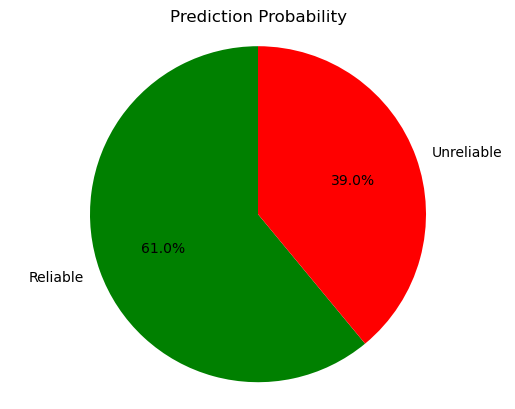

In [226]:
labels = ['Reliable', 'Unreliable']
colors = ['green', 'red']

plt.pie(prediction_proba, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Prediction Probability')
plt.show()